In [ ]:
import pandas as pd

titanic = pd.read_csv('titanic_train.csv')
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Etapa de Exploração de Dados**

In [ ]:
titanic['PassengerId'].value_counts()


,count
PassengerId,
1,1
599,1
588,1
589,1
590,1
...,...
301,1
302,1
303,1


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic['Survived'].value_counts()


,count
Survived,
0,549
1,342


In [ ]:
titanic['Pclass'].value_counts()


,count
Pclass,
3,491
1,216
2,184


In [ ]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
titanic.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Analise por agrupamentos**



In [ ]:
titanic.groupby('Pclass')['Survived'].value_counts()


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [ ]:
titanic[titanic['Survived'] == 1]['Age'].describe()


,Age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


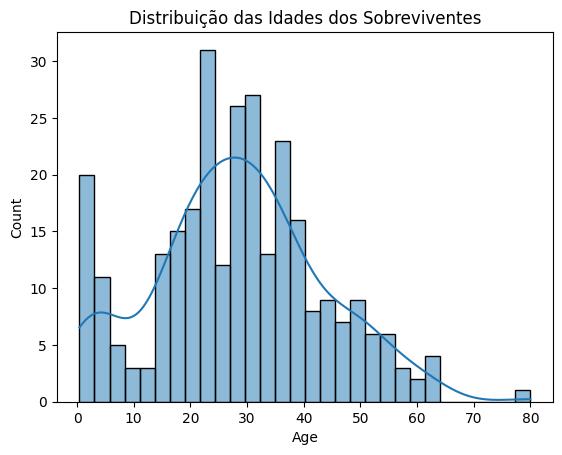

In [ ]:
sns.histplot(titanic[titanic['Survived'] == 1]['Age'], bins=30, kde=True)
plt.title("Distribuição das Idades dos Sobreviventes")
plt.show()

In [ ]:
#Sobrevivente com mais de 18 anos
titanic[(titanic['Survived'] == 1) & (titanic['Age'] >= 18)].shape[0]

229

In [ ]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1  # Criando uma coluna para o tamanho da família
familias_salvas = titanic[(titanic['Survived'] == 1) & (titanic['FamilySize'] > 1)]
num_familias_salvas = familias_salvas['FamilySize'].nunique()

print(f"Quantidade de famílias salvas juntas: {num_familias_salvas}")

Quantidade de famílias salvas juntas: 6


📊 **Teste de correlação entre variáveis**[texto do link](https://)
Você pode verificar se variáveis como idade, classe e gênero têm uma relação com a sobrevivência usando uma tabela de contingência (crosstab) e gráficos:


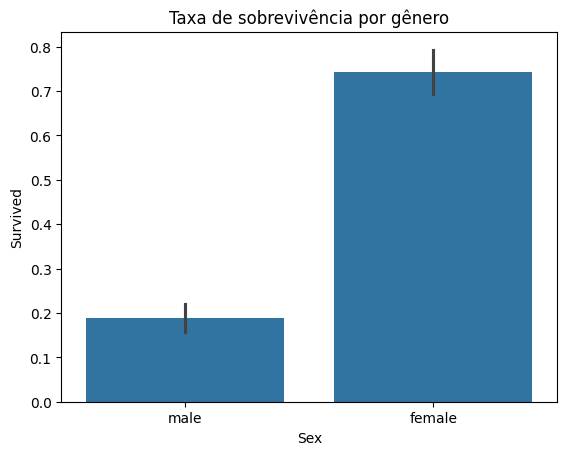

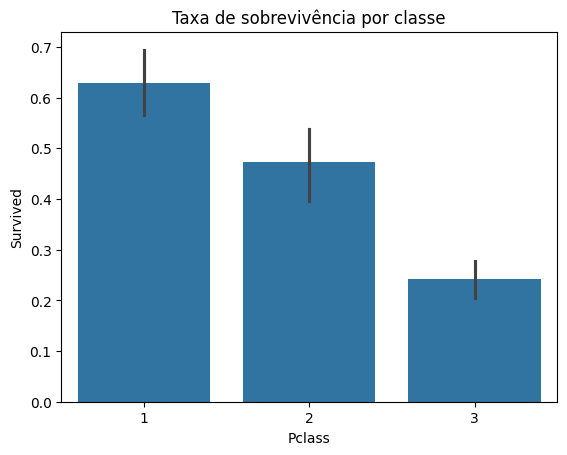

In [ ]:
# Relação entre gênero e sobrevivência
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Taxa de sobrevivência por gênero')
plt.show()

# Relação entre classe e sobrevivência
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Taxa de sobrevivência por classe')
plt.show()

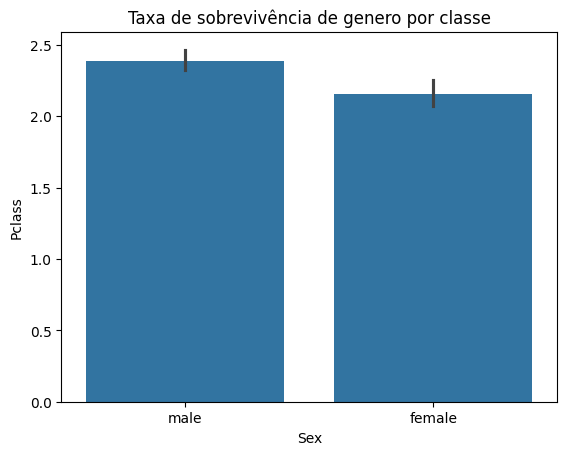

In [ ]:
#Relação entre gênero e classe
sns.barplot(x='Sex', y='Pclass', data=titanic)
plt.title('Taxa de sobrevivência de genero por classe')
plt.show()

<ipython-input-14-bf36a840daea>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Pclass', hue='Survived', data=titanic, ci=None)


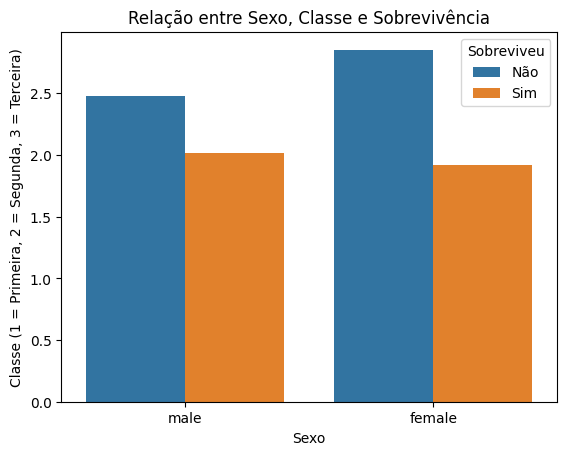

In [ ]:
sns.barplot(x='Sex', y='Pclass', hue='Survived', data=titanic, ci=None)
plt.title('Relação entre Sexo, Classe e Sobrevivência')
plt.ylabel('Classe (1 = Primeira, 2 = Segunda, 3 = Terceira)')
plt.xlabel('Sexo')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()